In [1]:
import sys
import pandas as pd
import mailbox
from collections import Counter
from datetime import datetime

# Visualization.
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns


This notebook analyzes a gmail inbox via `mailbox` module. I find deleting emails in gmail cumbersome given a max of 100 per page.

Exporting a gmail inbox via Google Takeout allows us to examine it for better understanding, with the goal of obtaining better control over our email.

This allowed me to use Vivaldi's email client to delete more than 100 emails at a time, going from **~17,000 to ~7,000 in a day**.


In [2]:
takeout = r'~/Downloads/takeout-20240319T205241Z-001' # File path to Google Takeout export.
mail = mailbox.mbox(f'{takeout}/Takeout/Mail/All mail Including Spam and Trash.mbox')
print("All messages:", len(mail))

All messages: 7674



You can download your gmail inbox's contents via [takeout.google.com](takeout.google.com).


In [3]:
# Unique gmail labels:
x_labels = []
for email in mail:
    if email['x-gmail-labels'] is not None:
        labels = email['x-gmail-labels'].split(',')
        x_labels.extend(labels)
set(x_labels)

{'Archived',
 'Category\r\n Personal',
 'Category Forums',
 'Category Personal',
 'Category Promotions',
 'Category Purchases',
 'Category Social',
 'Category Travel',
 'Category Updates',
 'IMAP_$MailFlagBit0',
 'IMAP_$MailFlagBit1',
 'Important',
 'Inbox',
 'Opened',
 'Sent',
 'Spam',
 'Starred',
 'Trash',
 'Unread'}

In [4]:
# Ignore 'Archived', 'Trash' as inbox categories - only emails that exist in 'Inbox'.
senders = [str(x['from']) for x in mail if x['x-gmail-labels'] is not None and 'Inbox' in x['x-gmail-labels']]
cnt = Counter()
for sender in senders:
    cnt[str(sender)] += 1
print(len(senders), "emails in 'Inbox' from", len(set(senders)), "unique senders")

4029 emails in 'Inbox' from 797 unique senders



#### This is the 'from:\<email_address\>' list you should search when cleaning your inbox:


In [5]:
top_n = 20
# top_res = dict(cnt.most_common(top_n)) # Uncomment to see.
# top_res


#### Visualization of the top 20 senders' emails.


In [6]:
# sns.barplot(x=list(top_res.values()), y=list(top_res.keys()))


#### Visualization of email volume over time.


In [7]:
# Use 'Received' instead of 'Date' - 'Received' has consistent datetime formatting.
print(mail[0]['Received'].split(';')[1].strip().rsplit(' ', 1)[0])

Tue, 19 Mar 2024 10:59:10 -0700


In [8]:
# datetime objects for all recevied emails.
datetime_list = []
for email in mail:
    if email['x-gmail-labels'] is not None and 'Inbox' in email['x-gmail-labels']:
        try:
            date_str = email['Received'].split(';')[1].strip().rsplit(' ', 1)[0]
        except (AttributeError) as e:
            print("Unable to split Message-ID {} {}".format(email['Message-ID'], str(e)), file=sys.stderr)
            continue
        dt_obj = datetime.strptime(date_str, '%a, %d %b %Y %H:%M:%S %z')
        datetime_list.append(dt_obj)

Unable to split Message-ID <CABhx6qA_iSrbksx9oUuGmm8AwNToW7R+++GfFfz=BVbPsCt7mw@mail.gmail.com> 'NoneType' object has no attribute 'split'


In [9]:
# Investigate problem emails via 'Message-ID' field.
# for email in mail:
#     if '<CABhx6qA_iSrbksx9oUuGmm8AwNToW7R+++GfFfz=BVbPsCt7mw@mail.gmail.com>' in email['Message-ID']:
#         print(email)

In [10]:
df = pd.DataFrame(datetime_list, columns=['timestamp'], dtype='datetime64[ns, UTC]')
df['value'] = 1
df.set_index('timestamp', inplace=True)

In [11]:
monthly_data = df.resample('M').sum()
monthly_data['year_month'] = monthly_data.index.strftime('%Y, %m')
monthly_data['label'] = monthly_data['year_month'].apply(lambda x: x[:4] if x[-2:] == '01' else '')
monthly_data

,value,year_month,label
timestamp,,,
2020-12-31 00:00:00+00:00,1,"2020, 12",
2021-01-31 00:00:00+00:00,123,"2021, 01",2021
2021-02-28 00:00:00+00:00,110,"2021, 02",
2021-03-31 00:00:00+00:00,100,"2021, 03",
2021-04-30 00:00:00+00:00,101,"2021, 04",
2021-05-31 00:00:00+00:00,88,"2021, 05",
2021-06-30 00:00:00+00:00,80,"2021, 06",
2021-07-31 00:00:00+00:00,130,"2021, 07",
2021-08-31 00:00:00+00:00,121,"2021, 08",


Text(0, 0.5, 'Number of Emails (Each bar = 1 month)')

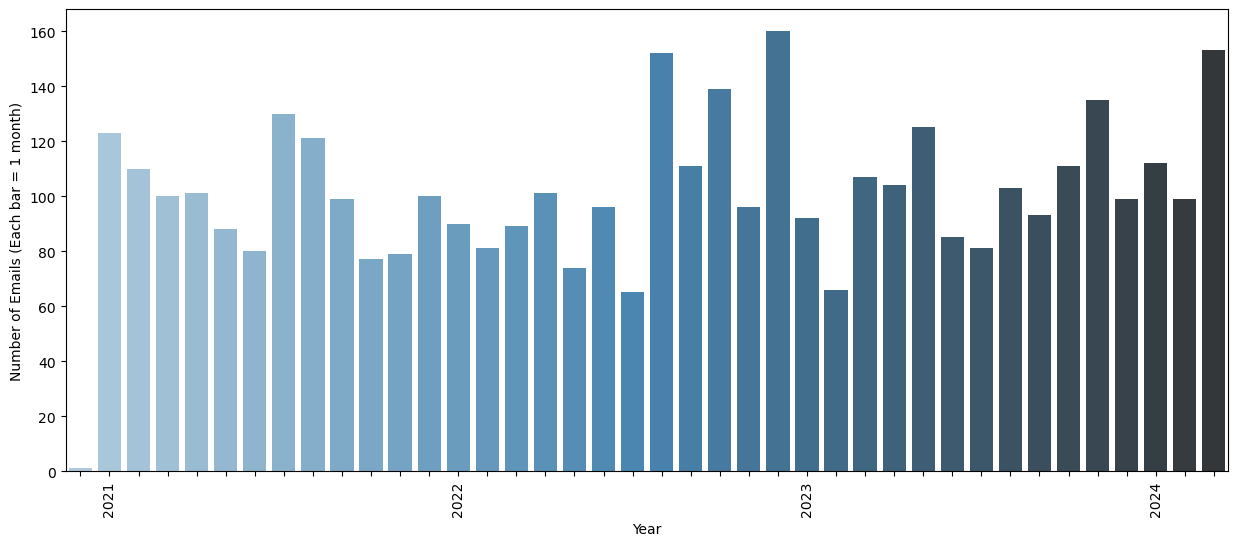

In [12]:
monthly_data_reset = monthly_data.reset_index()
plt.figure(figsize=(15, 6))
barplot = sns.barplot(x='year_month', y='value', data=monthly_data_reset, palette="Blues_d")
barplot.set_xticklabels(monthly_data_reset['label'], rotation=90)
plt.xlabel('Year')
plt.ylabel('Number of Emails (Each bar = 1 month)')